In [1]:
%load_ext autoreload
%autoreload 2

import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
import sys

# this is needed when importing from the notebooks folder
sys.path.append('../')
from lobster import Lightcurve
from lobster.filtering import sin4_filter

removed 9719 bad quality data points (18.20%)
removed 426 (0.98%) outliers with sigma_clipping method, std deviation and threshold = 6
n = 0.7398486165659958
normalized with adaptative filter sin4_filter, cutoff periods of 0.50 d and 3.00 d, from threshold 0.7398 to 1.2398, little filter used for 3.68% of data
removed 45 (0.14%) outliers with sigma_clipping method, std deviation and threshold = 5


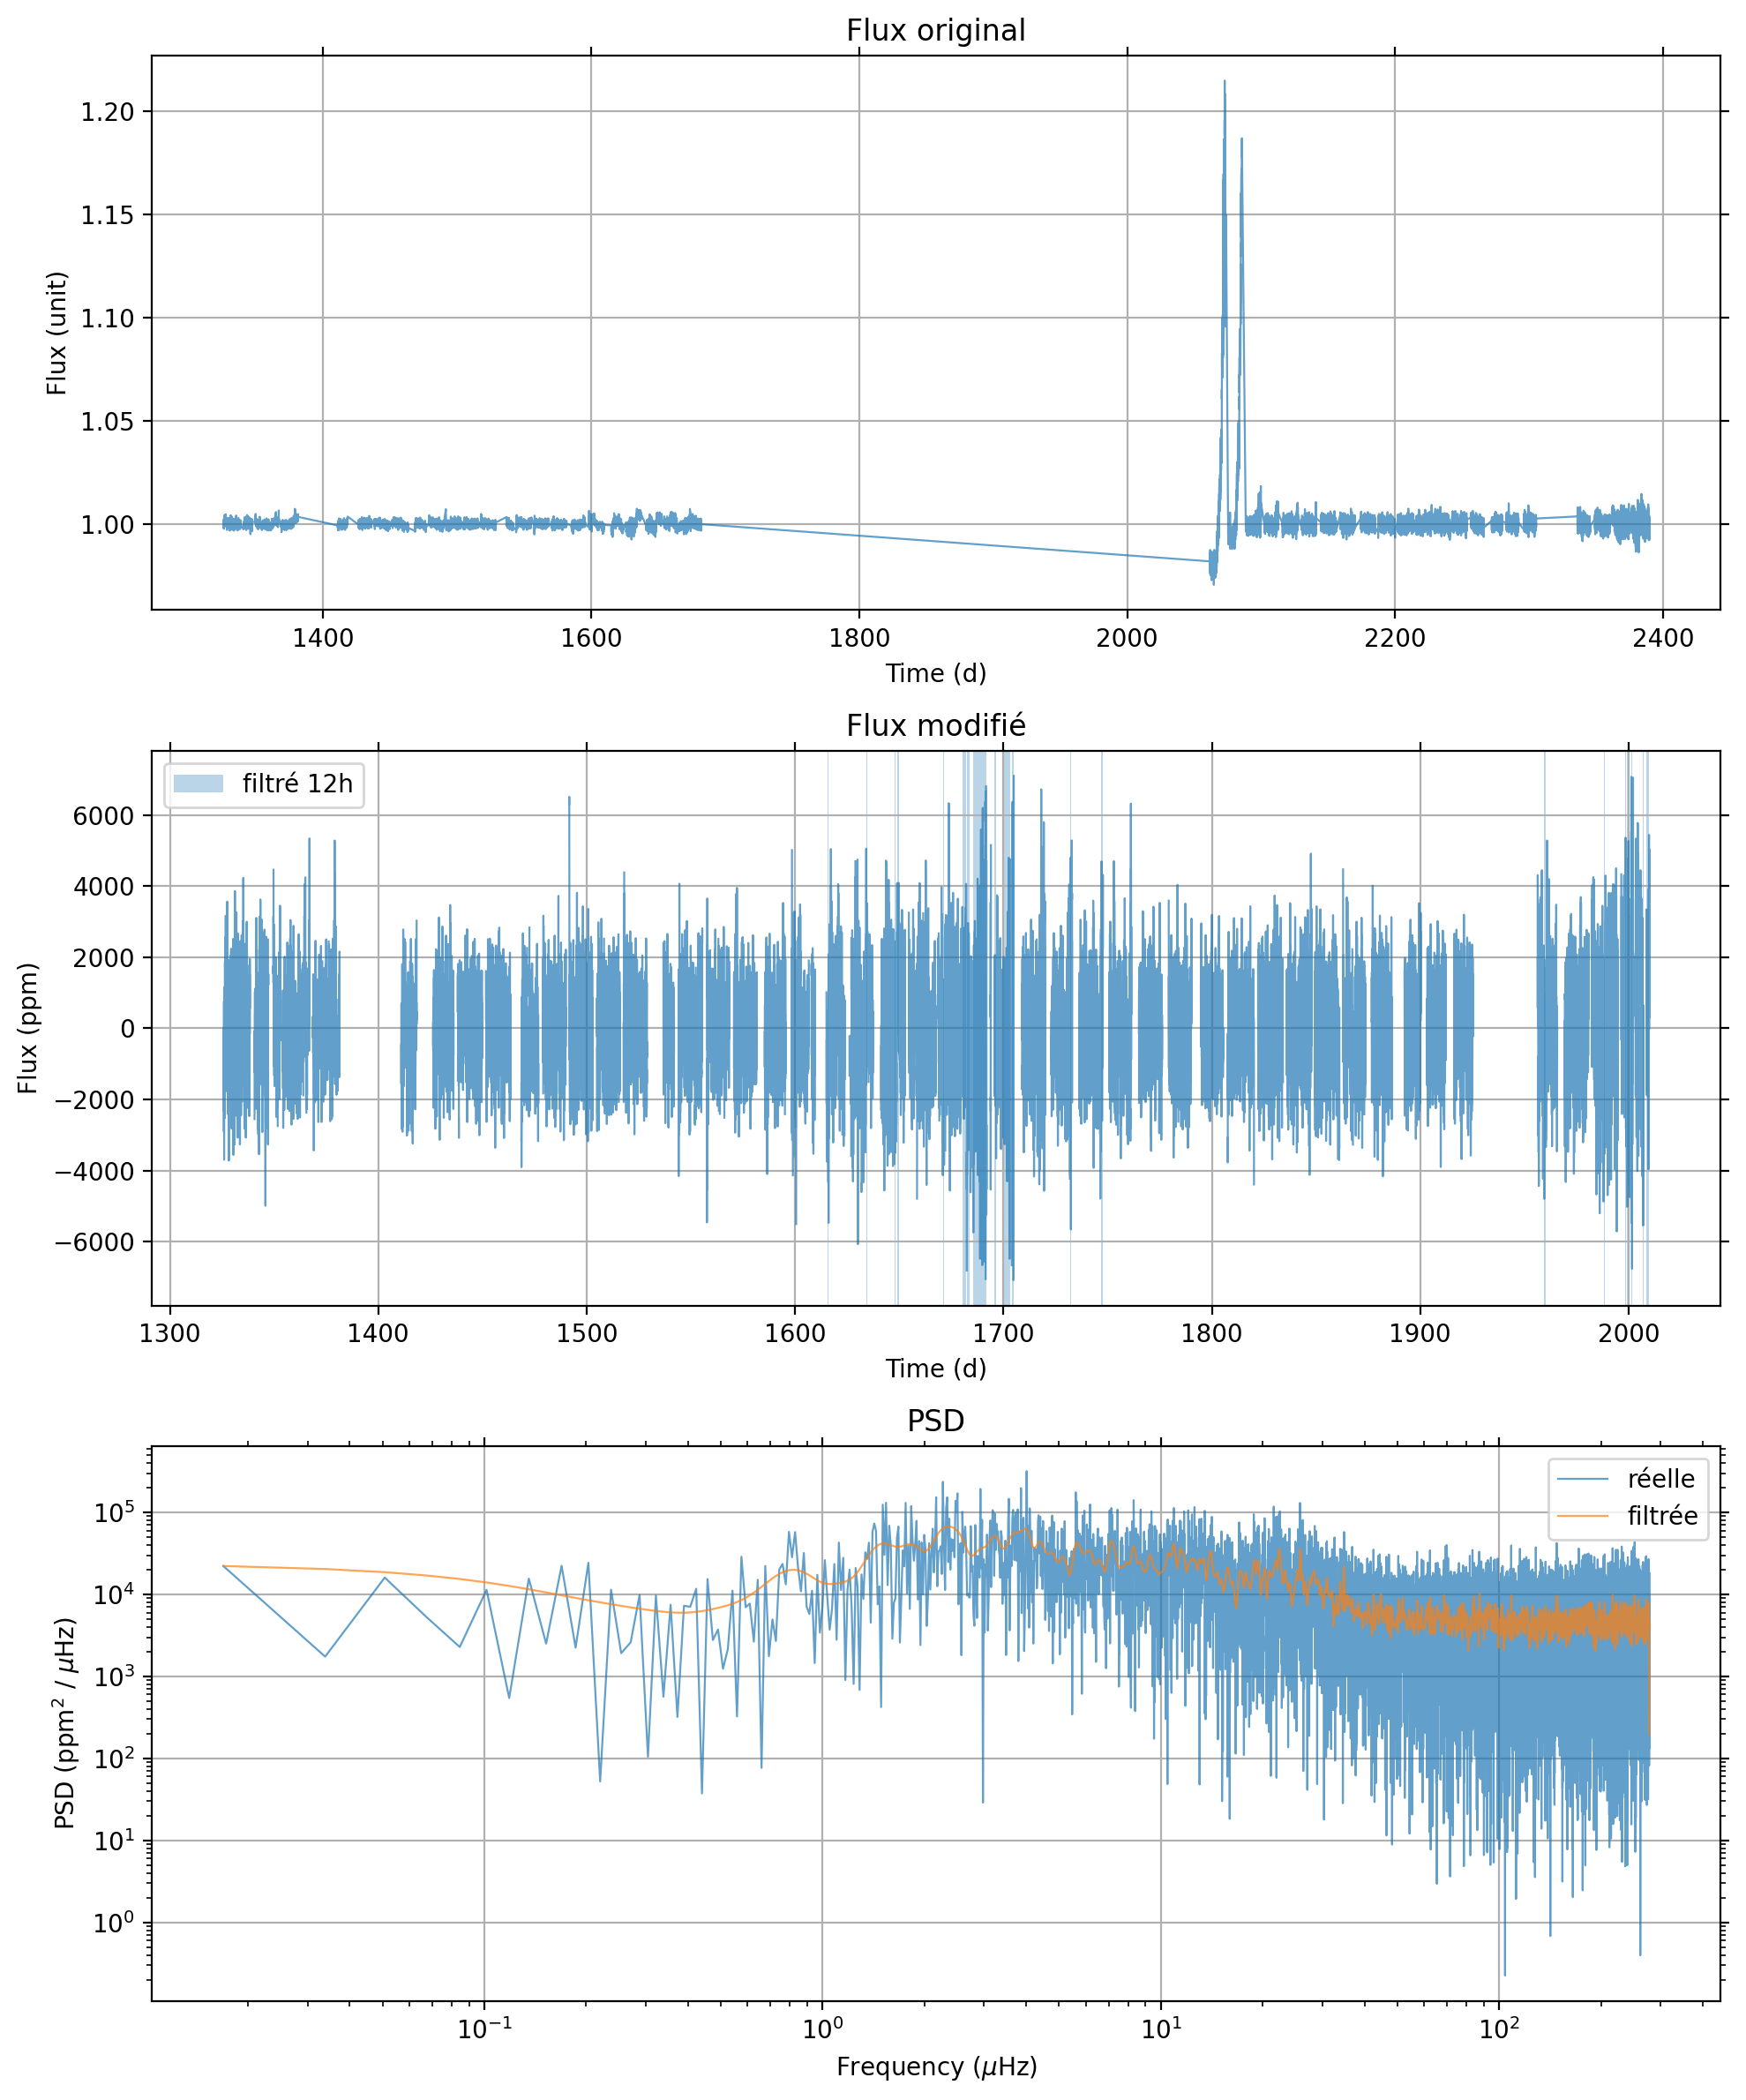

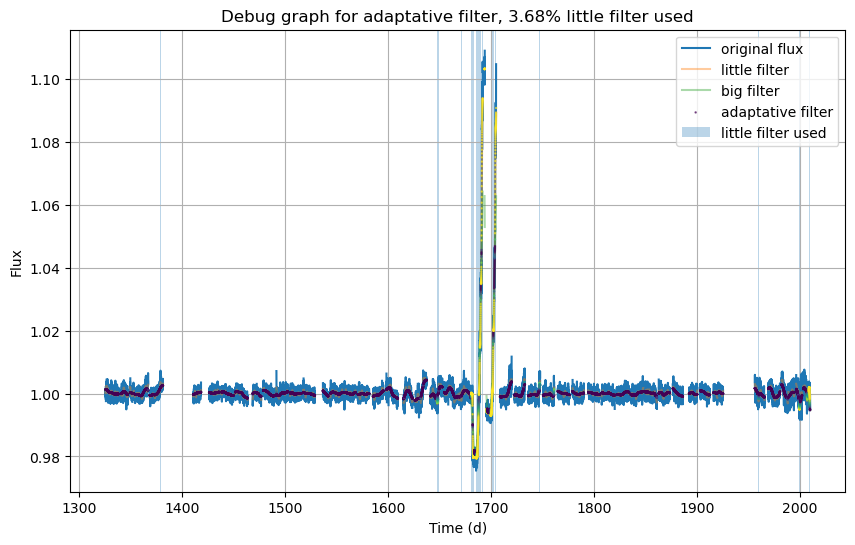

In [4]:
%matplotlib inline

lc = Lightcurve().load_qlp('../../4MOST/DATA/000000026050/0000000260501775/qlp/')

plt.close('all')
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,12), dpi=200)

lc.debug = True

# remove bad points
lc.remove_quality()
print(lc.operations[-1][0])
lc.remove_invalids()

# plot the result in the first subplot
lc.plot_flux(ax=ax1, title="Flux original")

# remove the 1y gap
lc.remove_large_jumps(90)

lc.remove_outliers(threshold=6)
print(lc.operations[-1][0])

lc.resample(0.5/24)

# we use either a 12h or a 3d window duration, based on an indicator (that we return)
# which shows how much the flux is diverging from its long-term behaviour. The n_sigmas
# indicates the transition gap between the small and big window being used, increasing
# n_sigmas will lead to a flux being more and more normalized according to the bigger filter.
n = 1/(np.nanstd(lc.flux) * 190)
print("n =", n)
indicator = lc.normalize_adaptative_sin4_filter(
    cut_above_periods=(12/24, 3), thresholds=(n, n + .5), return_indicators=True
)
lc.plot_correction_zones(ax2, correction=indicator, label="filtré 12h")
print(lc.operations[-1][0])

# remove outliers based on two successive methods; this is effective but may be too agressive
lc.remove_outliers(identification_mode="sigma_clipping", threshold=5, removal_mode='NaN')
print(lc.operations[-1][0])

# prepare for the PSD
lc.flux_to_ppm()

# plot the modified flux in the second subplot
lc.plot_flux(ax=ax2, title="Flux modifié")

# plot the resulting PSD in the third subplot, along with a filtered version of it
lc.plot_psd(ax=ax3, label="réelle")
lc.plot_psd(ax=ax3, psd_filter=lambda x: sin4_filter(x, 41), label="filtrée")

fig.tight_layout()

In [25]:
sum(indicator > 0) / len(indicator) * 100

3.6836337067705798

0: loaded as QLP from FITS, 23 quarters read
1: generated from quarters, 22 jumps added
2: beggining the debug mode
3: removed 9719 bad quality data points (18.20%)
4: removed 0 invalid data points (0.00%)
5: removed 1 large jumps in time > 90 d
6: removed 426 (0.98%) outliers with sigma_clipping method, std deviation and threshold = 6
7: resampled data to new dt of 0.020833 d
8: normalized with adaptative filter sin4_filter, cutoff periods of 0.50 d and 3.00 d, from threshold 0.7398 to 1.2398, little filter used for 3.68% of data
9: removed 45 (0.14%) outliers with sigma_clipping method, std deviation and threshold = 5
10: centered and multiplied by 10^6 the flux


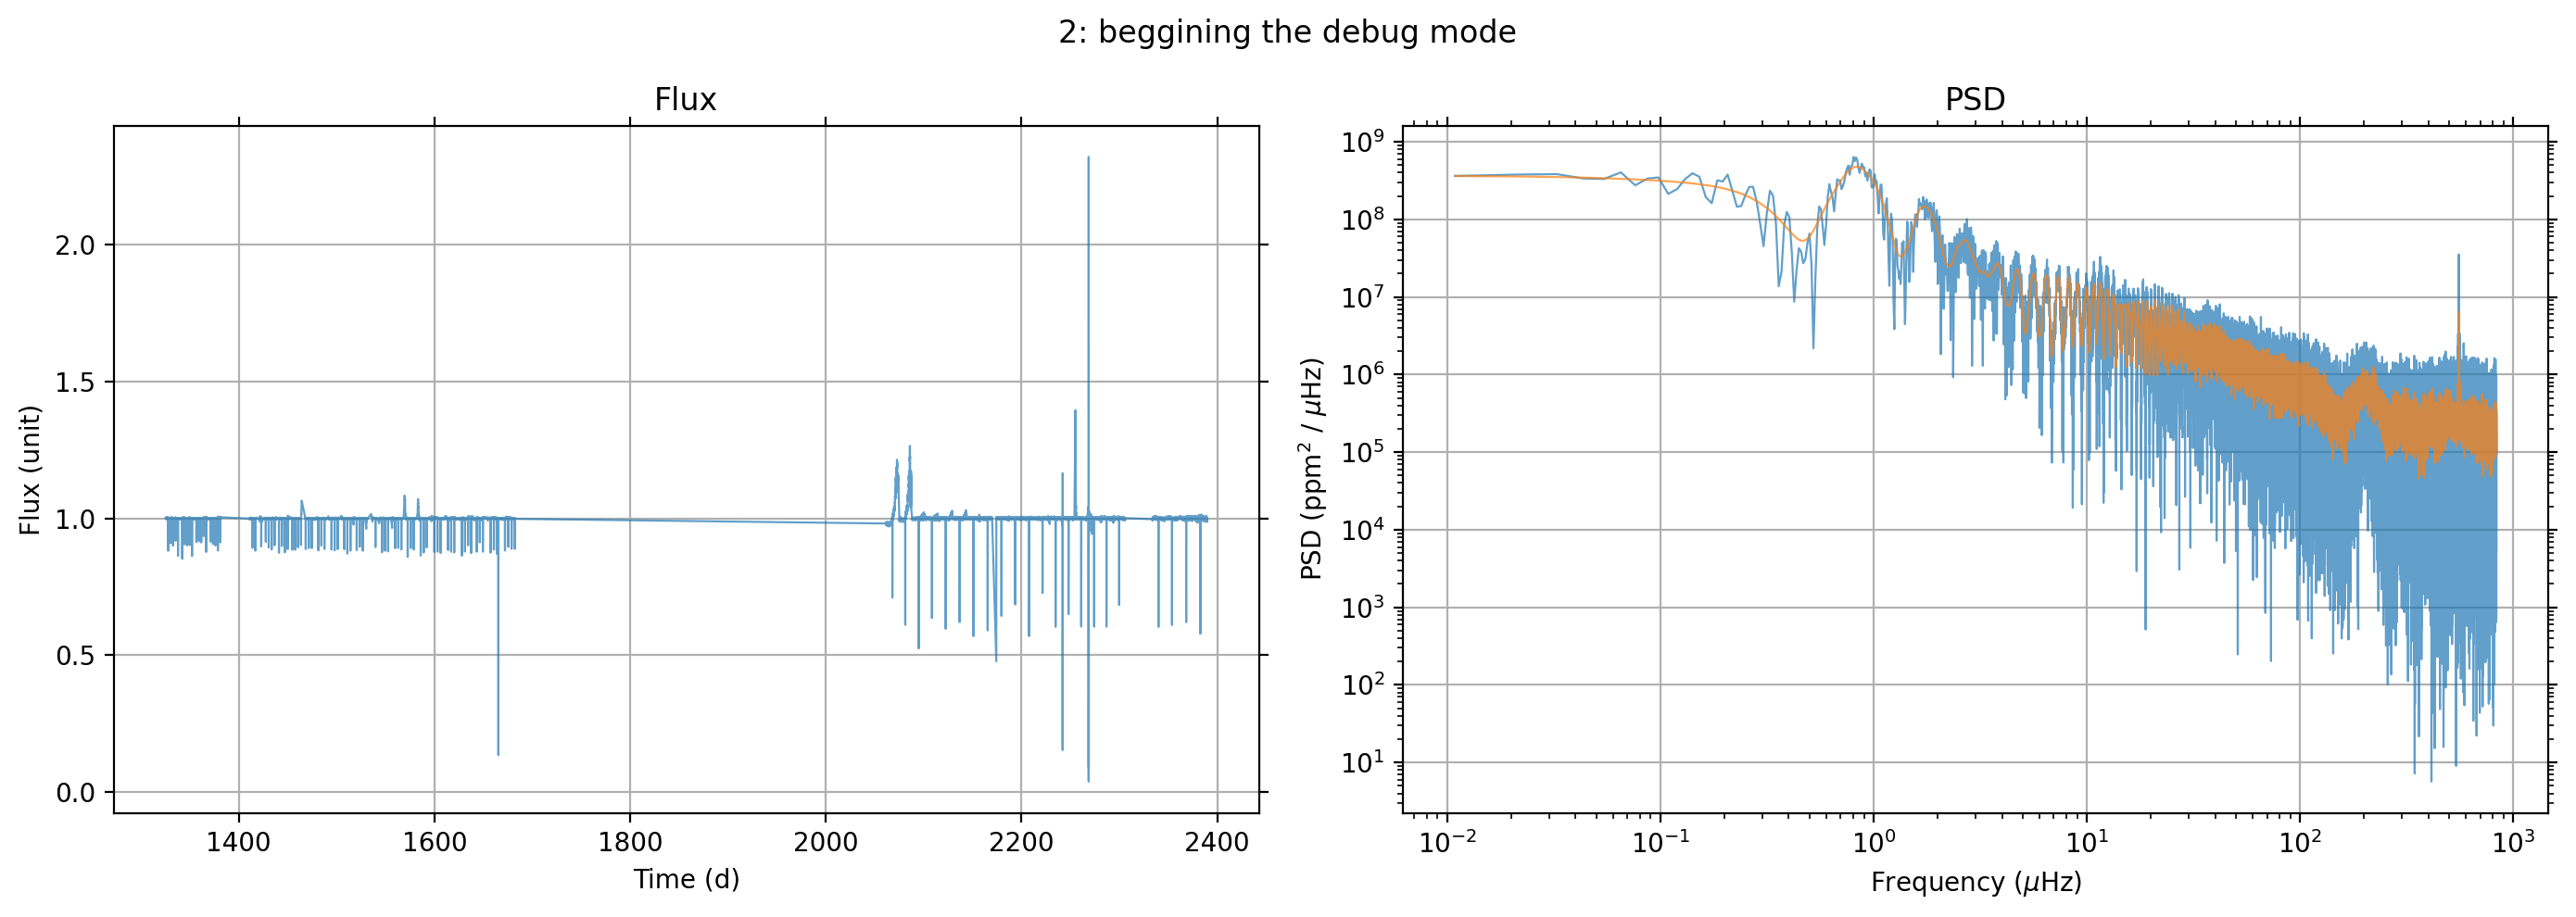

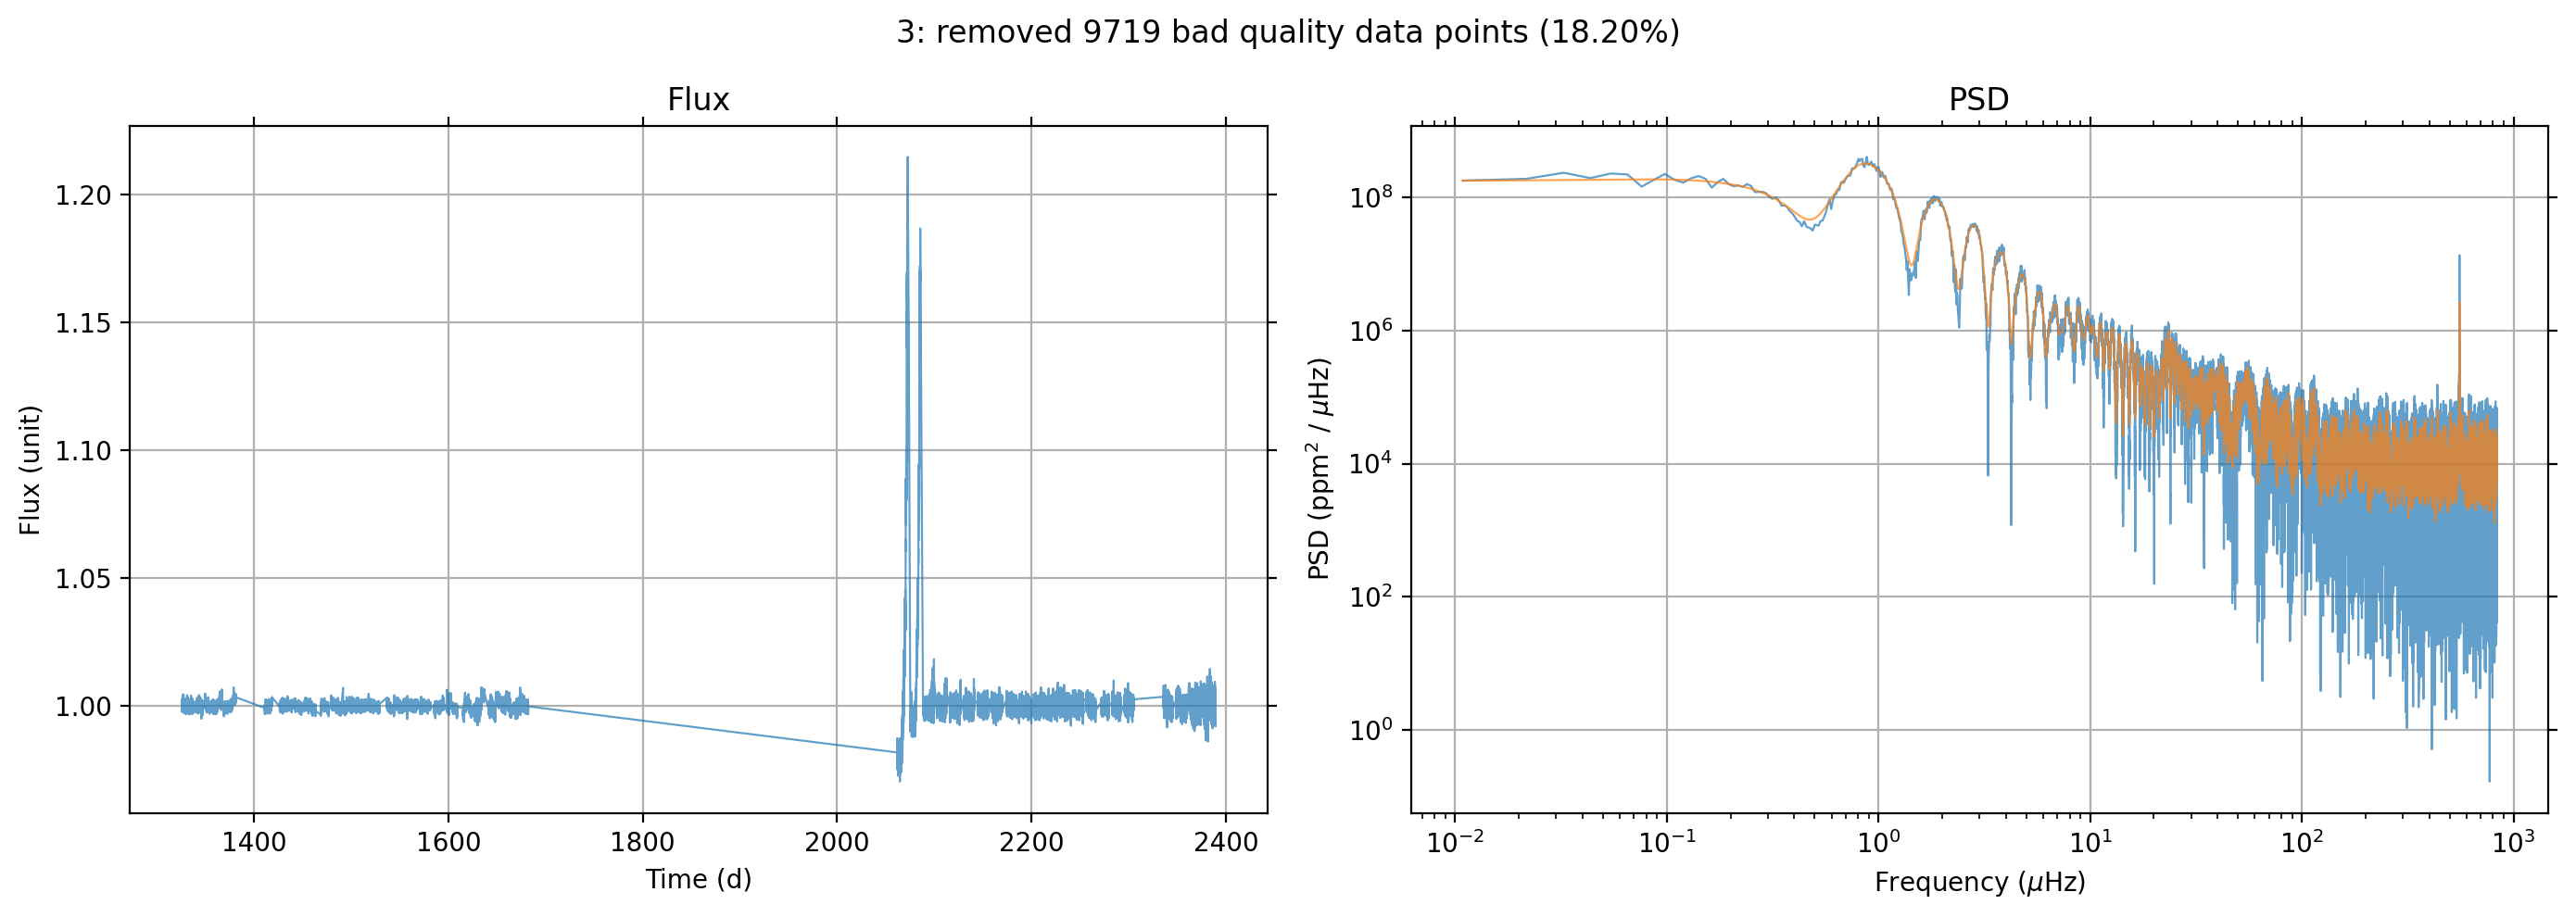

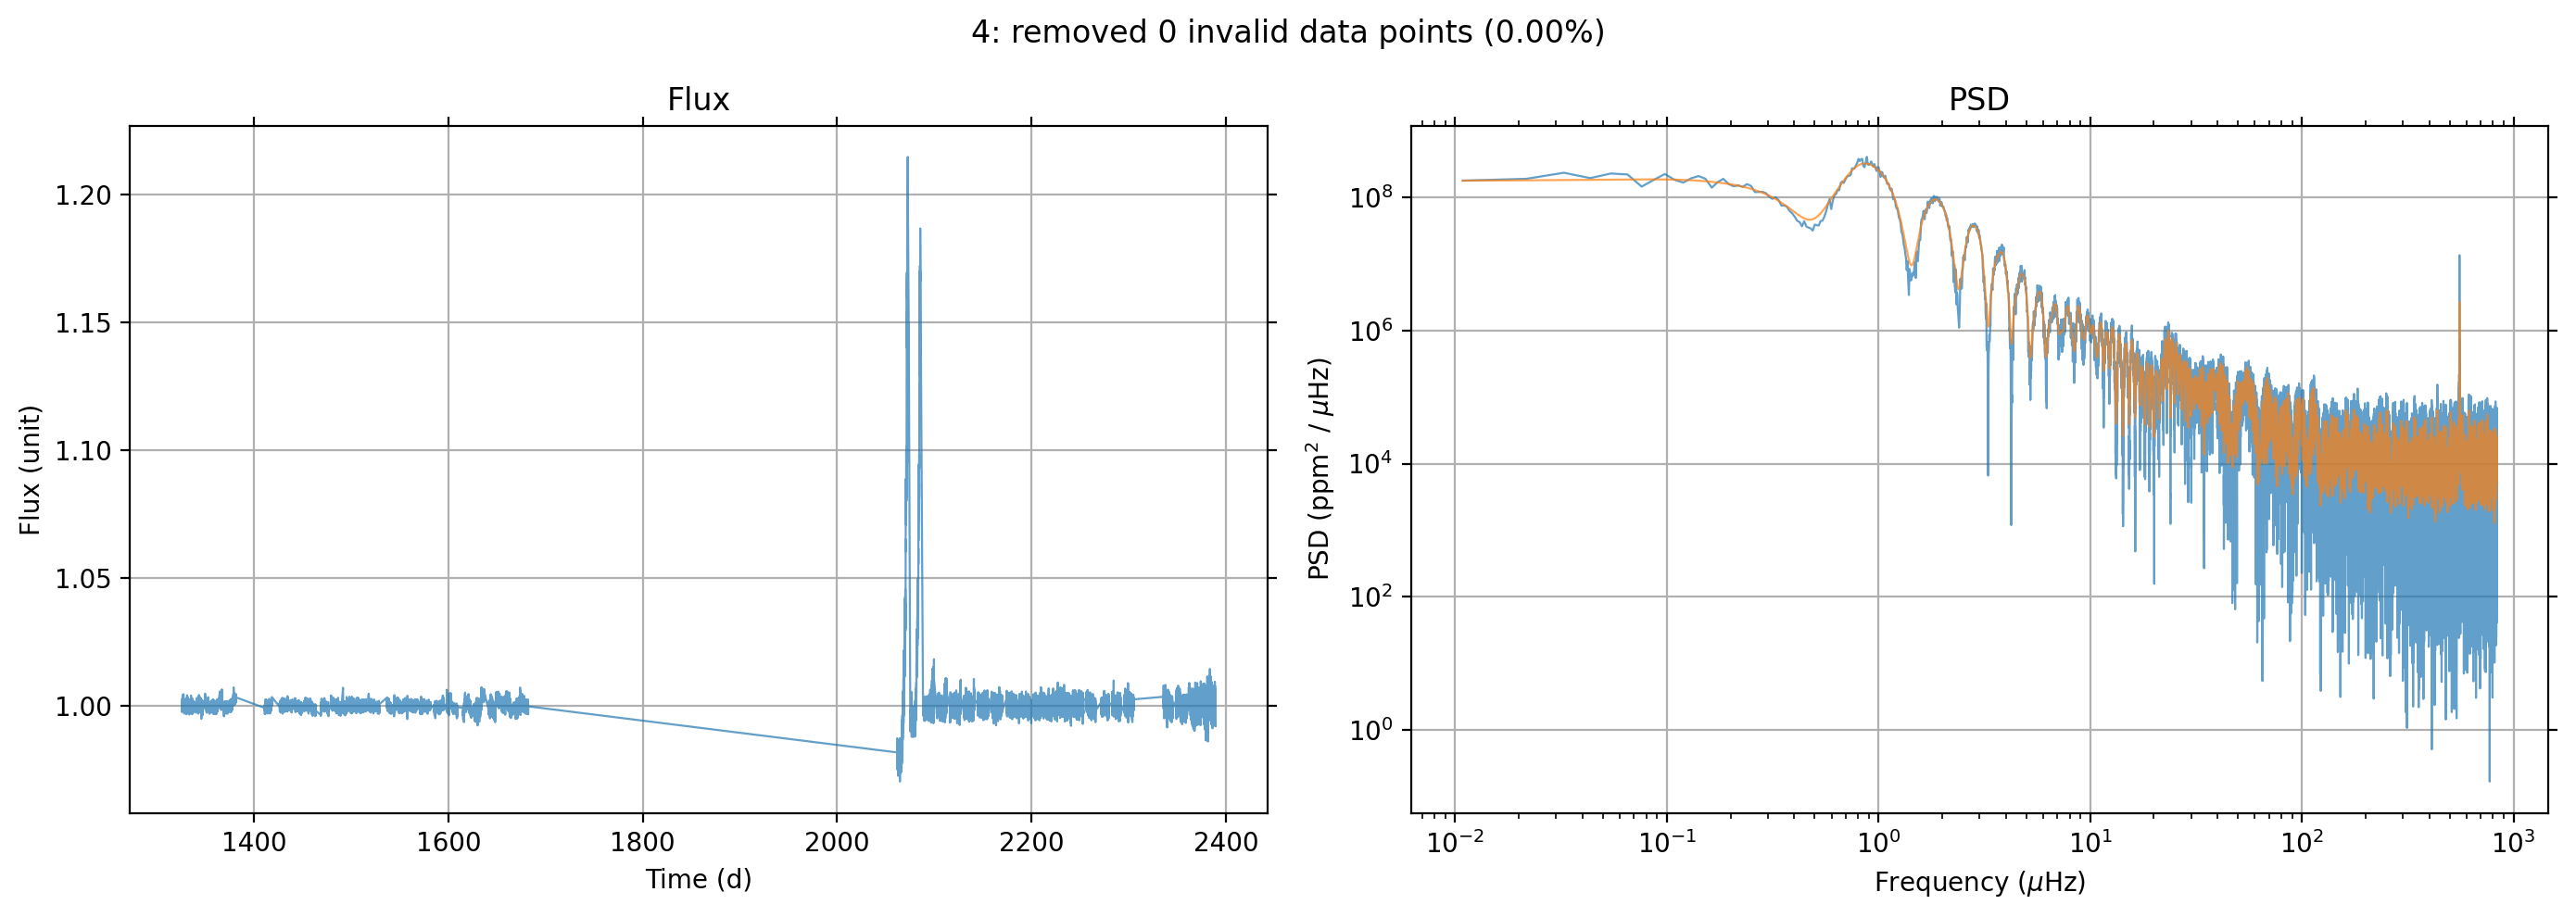

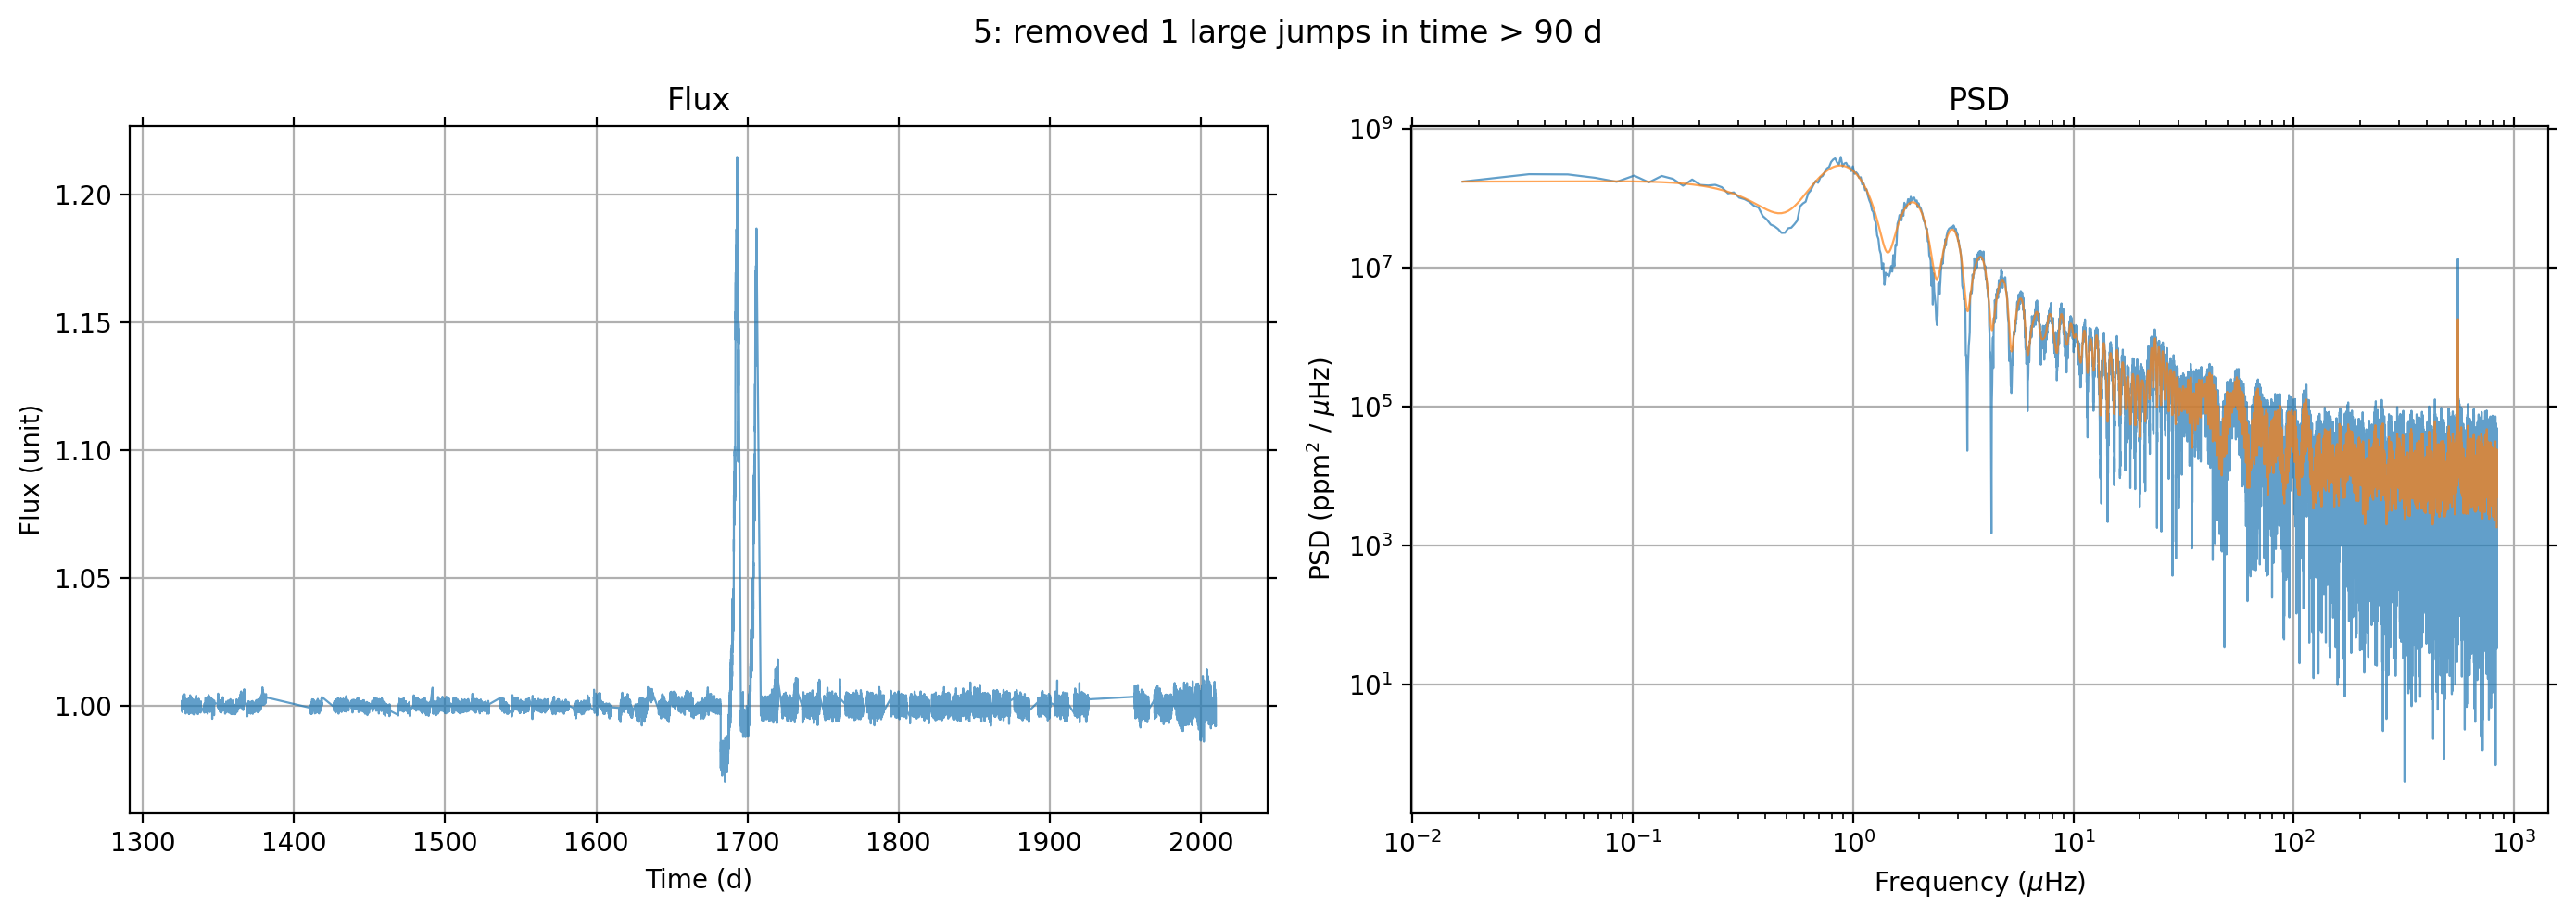

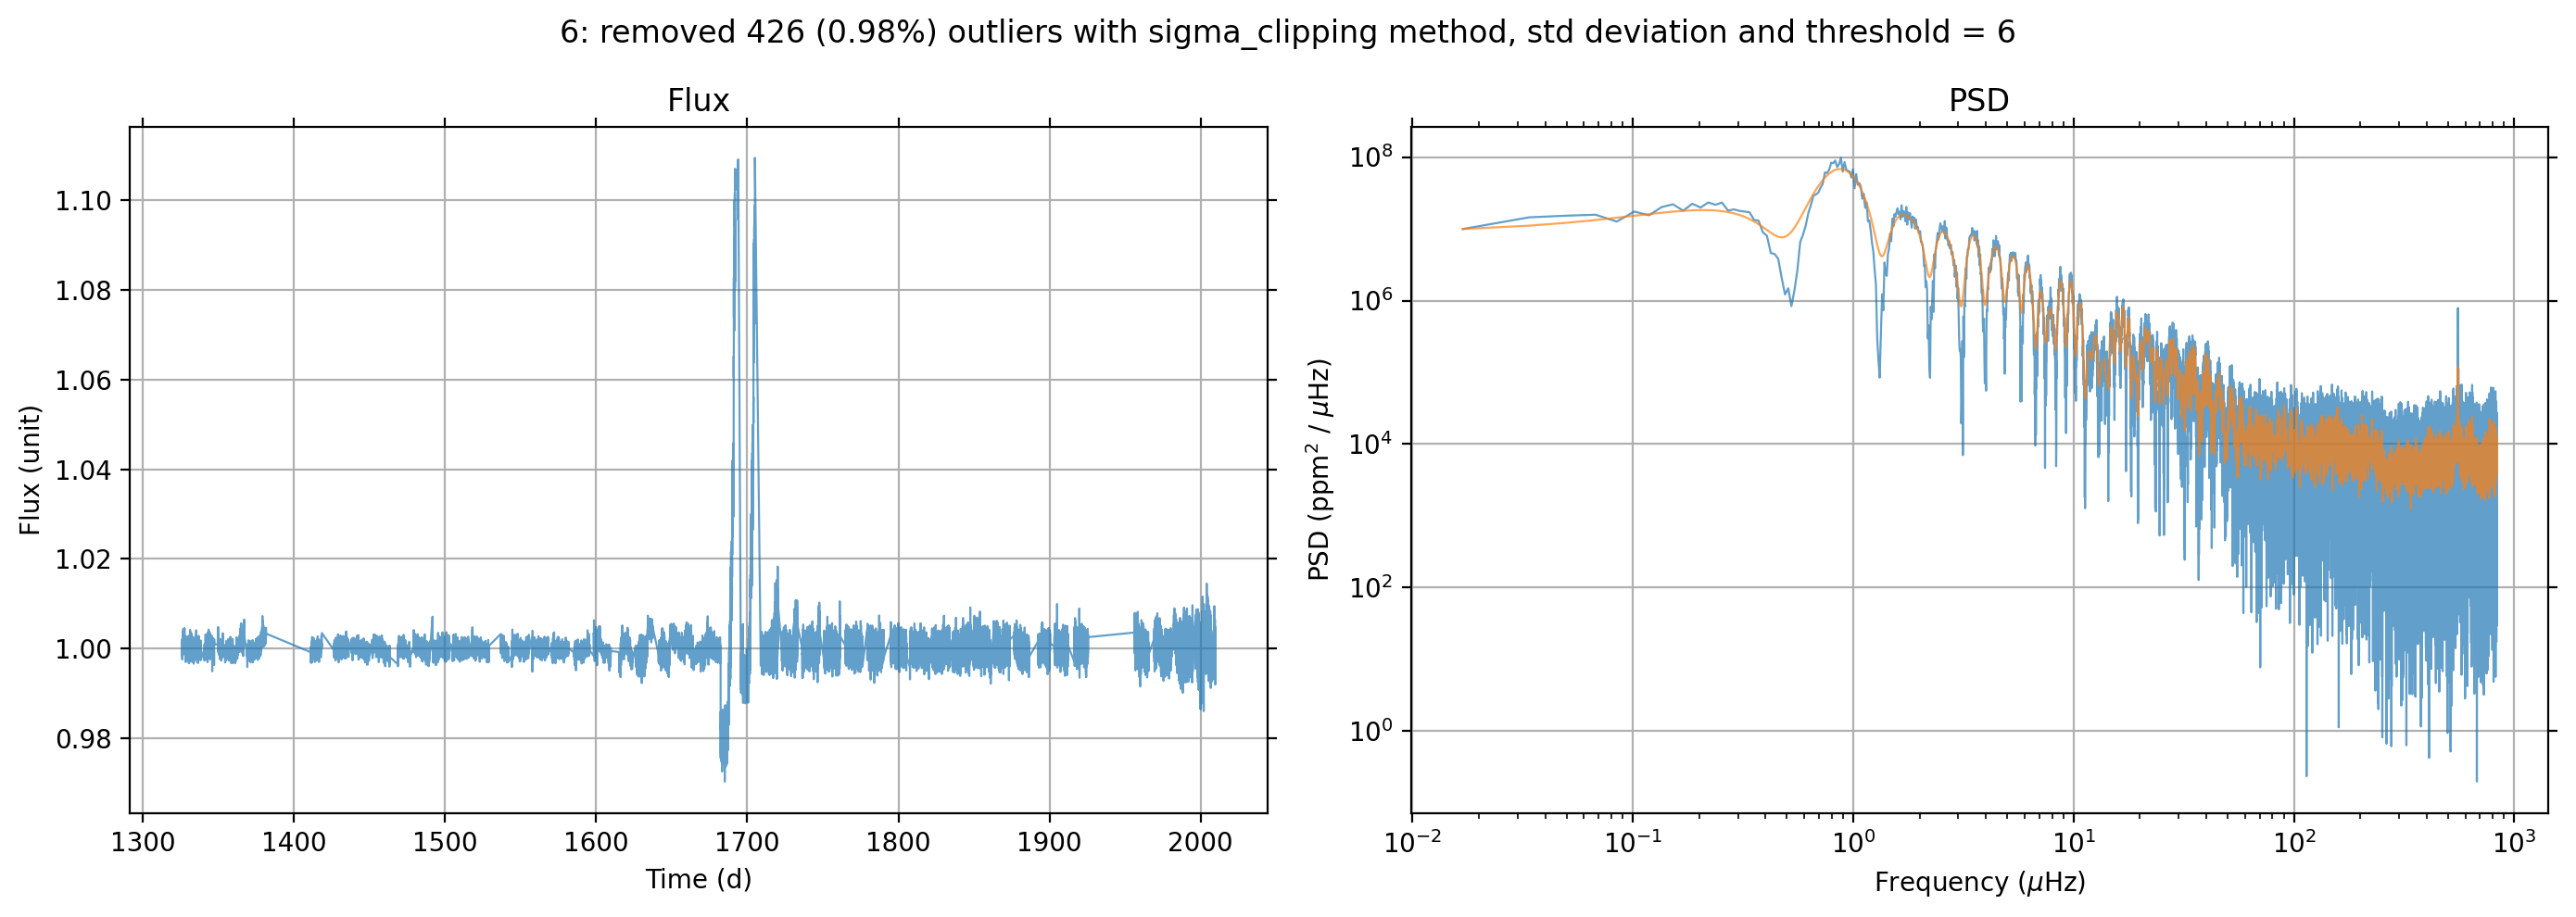

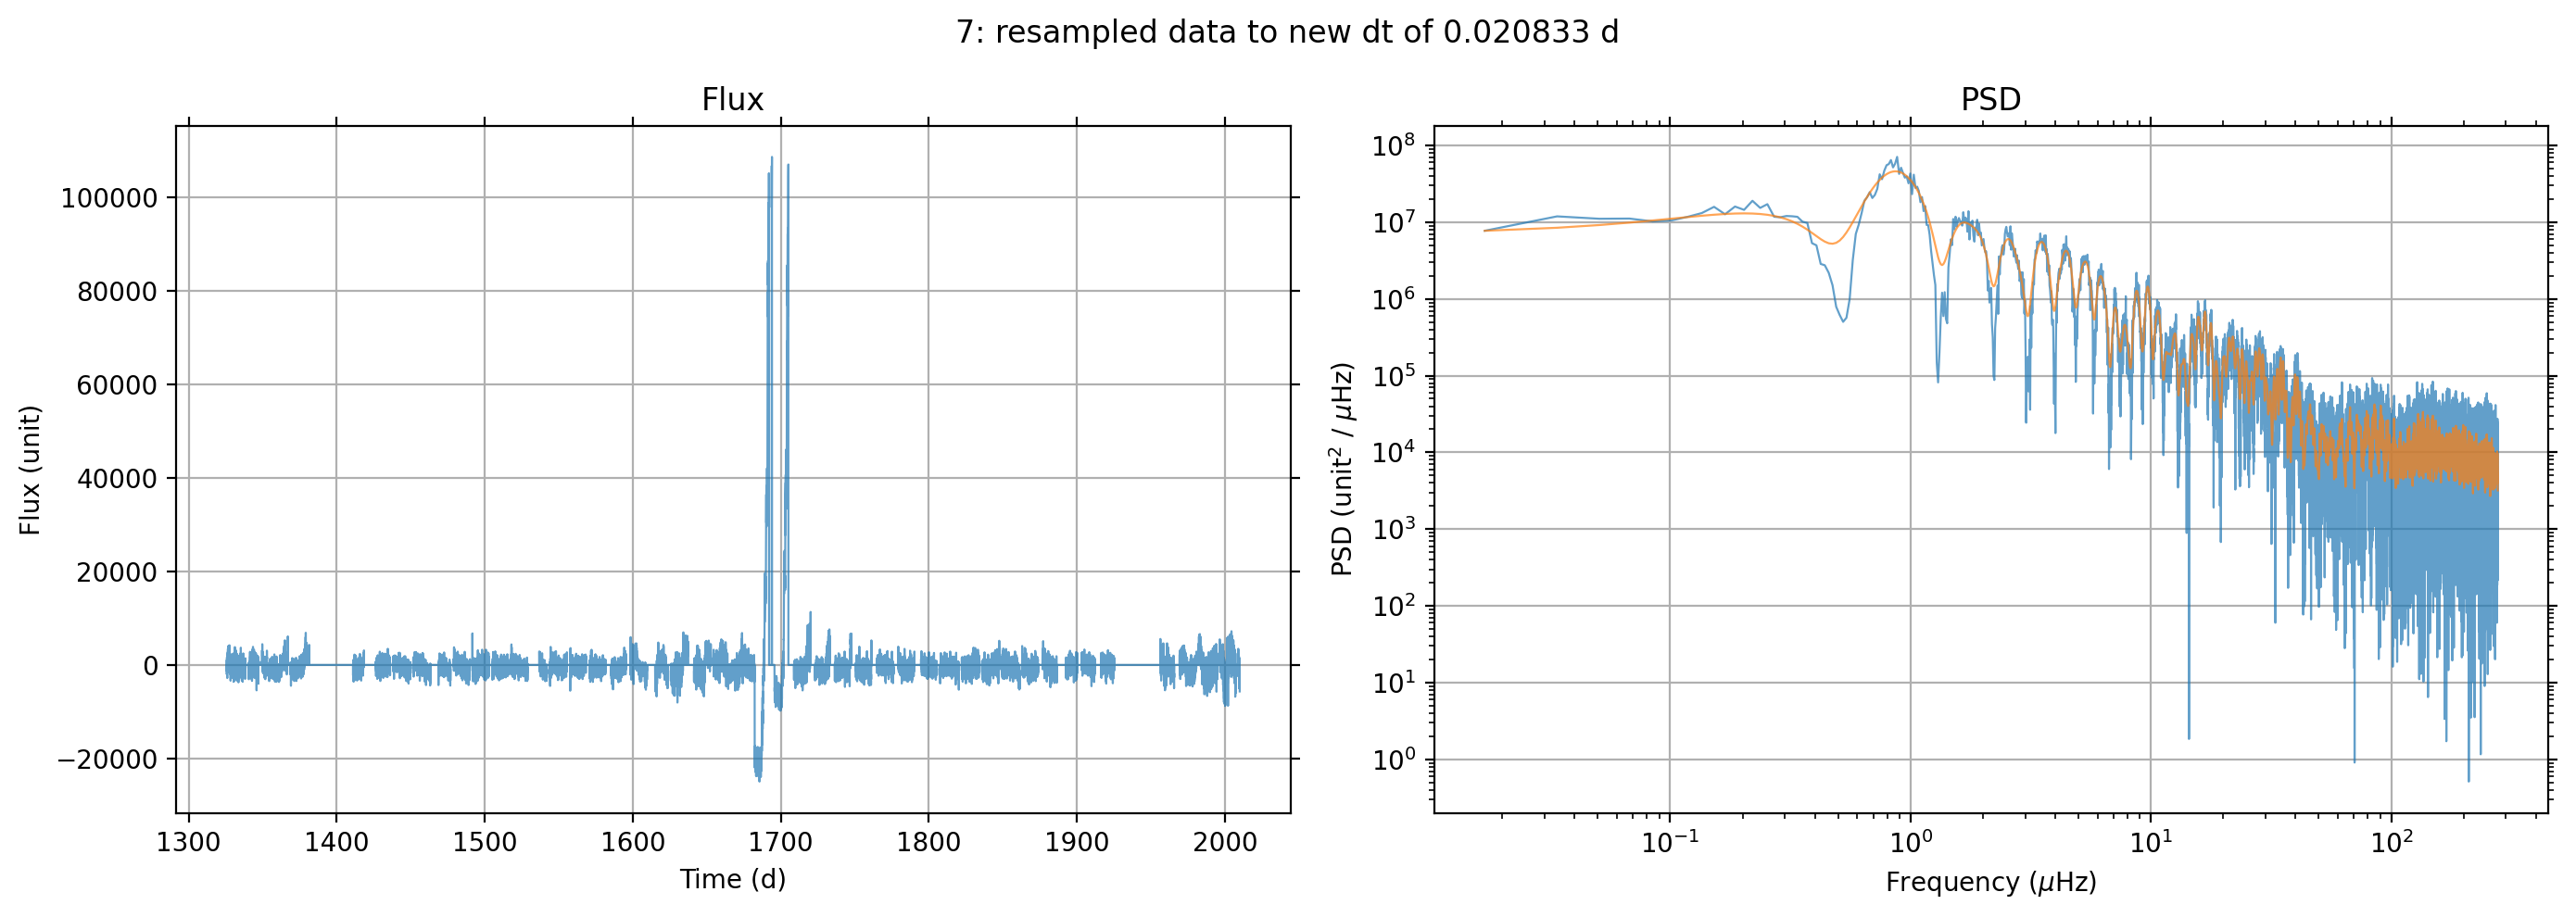

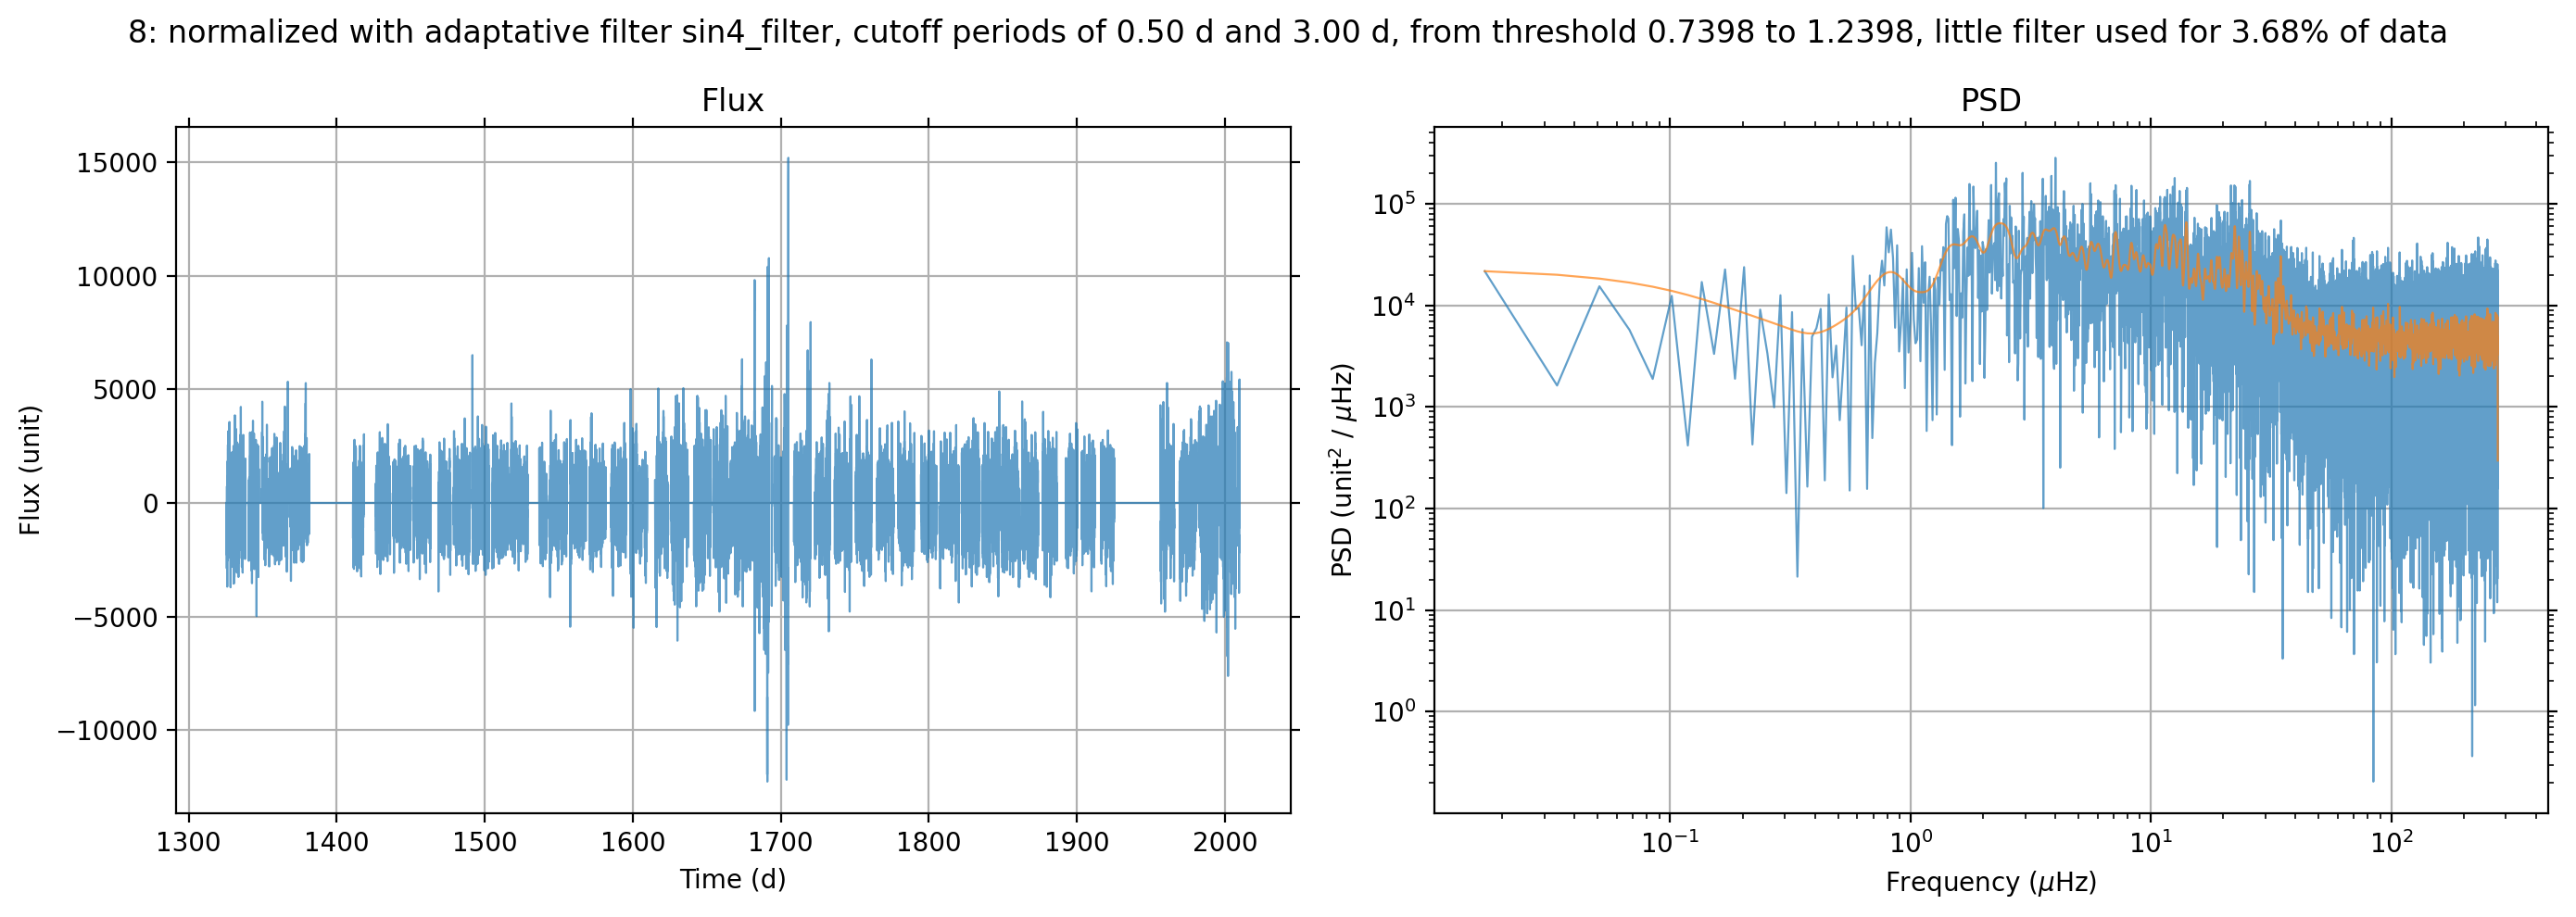

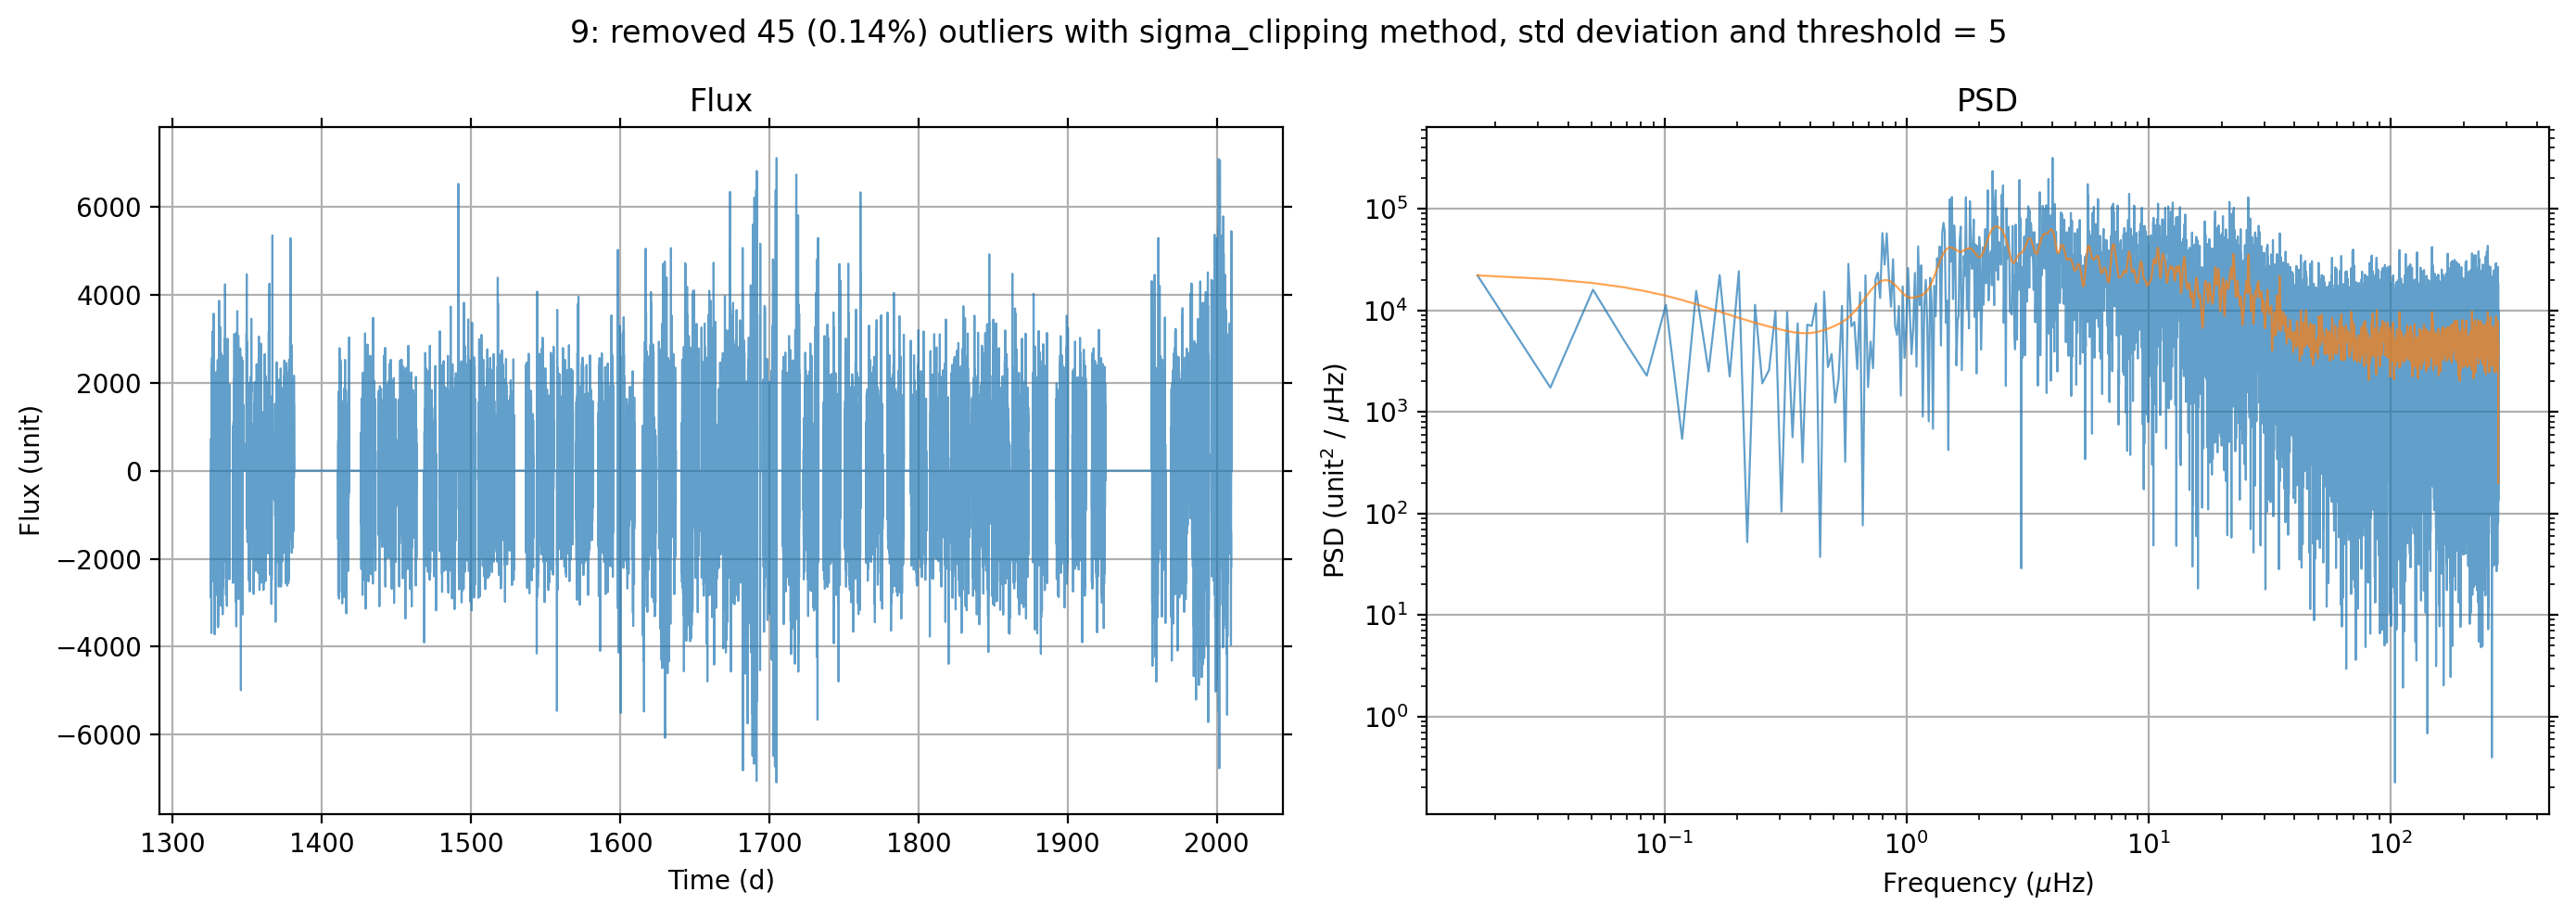

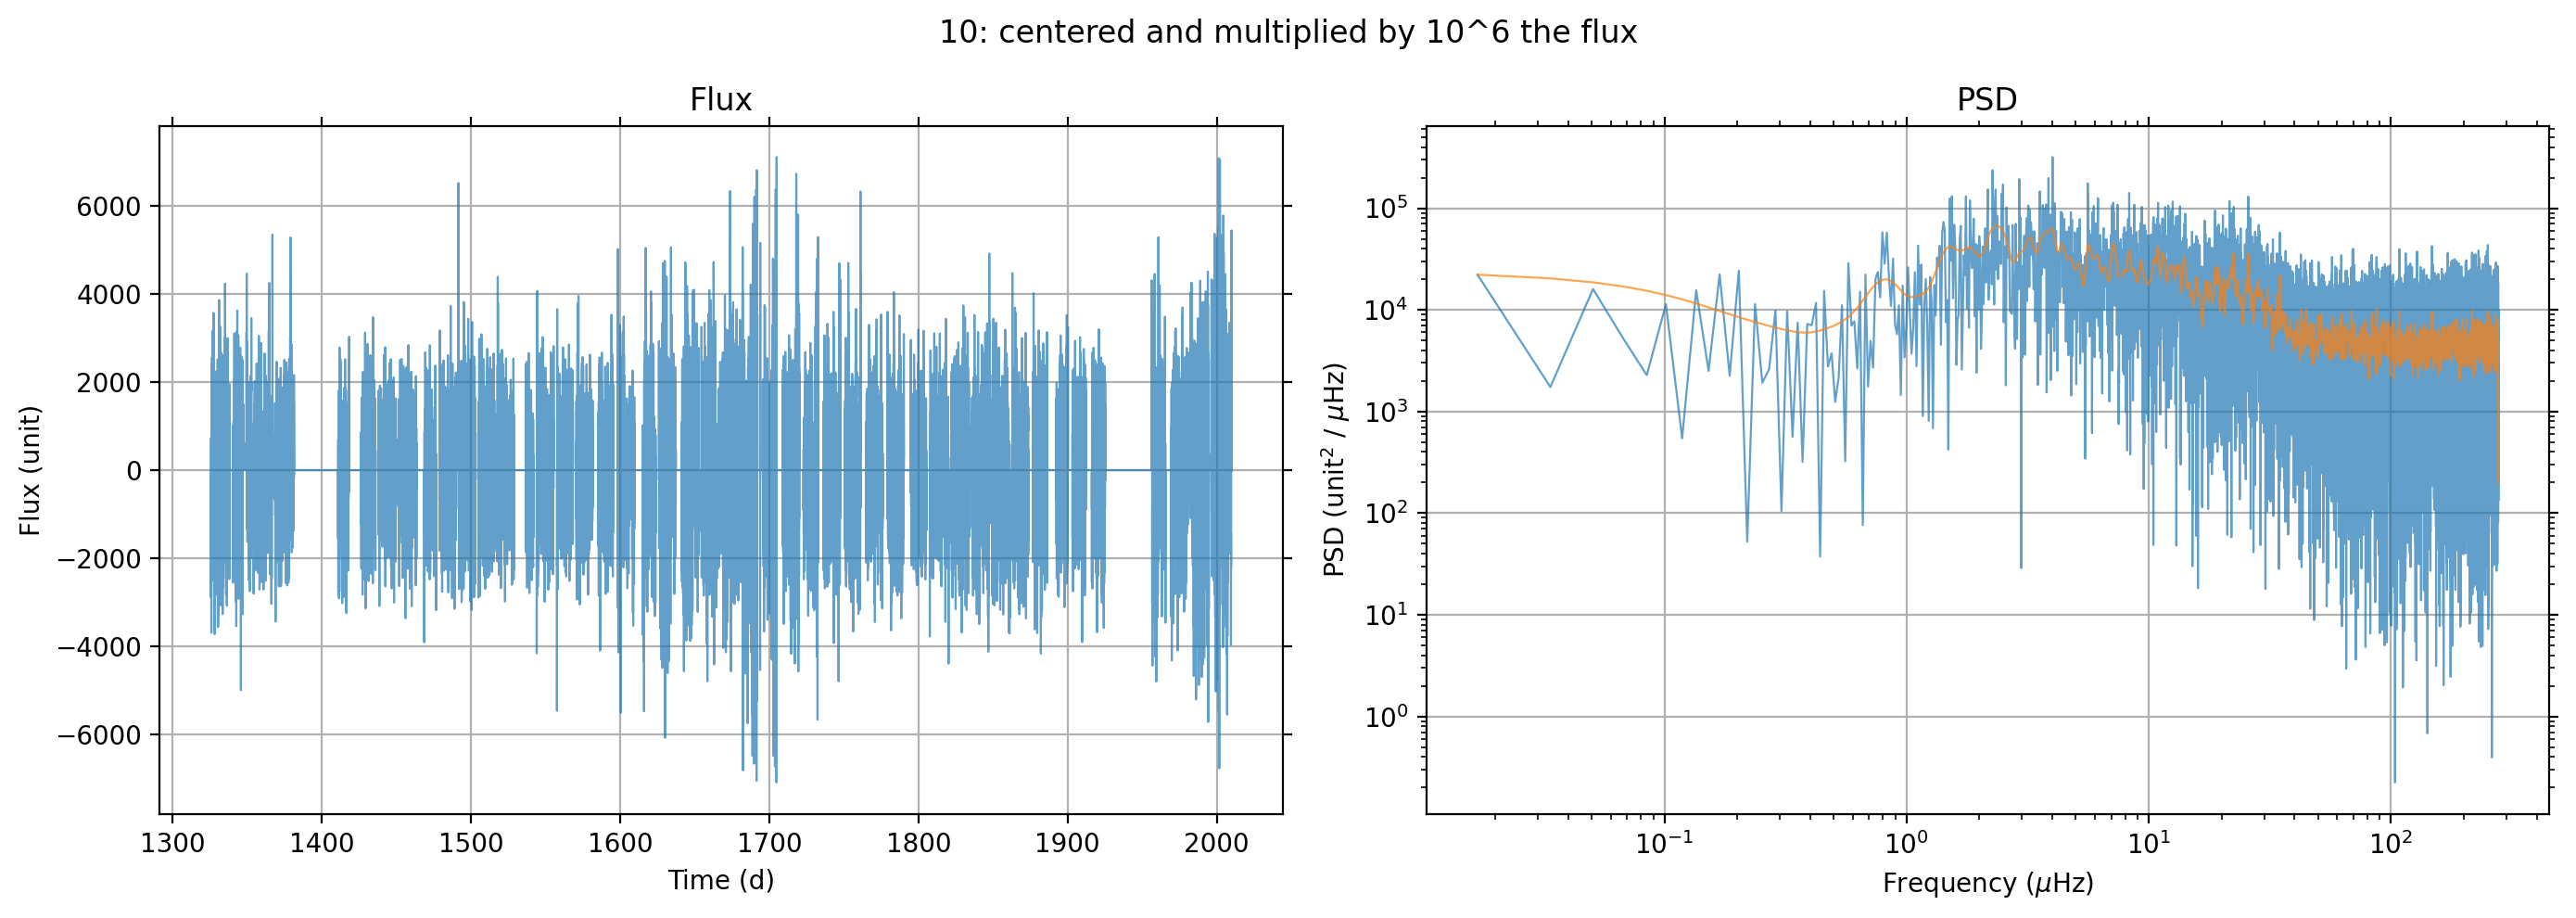

In [6]:
%matplotlib inline

plt.close('all')
lc.figsize = (14,5)
lc.dpi = 200
lc.print_operations()